# Ansuman Das, 17PH20006

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
import seaborn as sns
import random
f=66
random.seed(f)
np.random.seed(f)

/home/ansuman/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
columns=["Class","Alcohol","Malic acid","Ash","Alcalinity of ash","Magnesium"\
         ,"Total phenols","Flavanoids","Nonflavanoid phenols","Proanthocyanins","Color intensity","Hue"\
        ,"OD280/OD315 of diluted wines","Proline"]

df=pd.read_csv("assignment2/wine.data", names=columns)


In [3]:
df.head()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
df.describe()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [5]:
X=df.drop("Class",axis=1).values
display(X)
Y=df.Class.values
display(Y)
print("X shape = ",X.shape)
print("Y shape = ",Y.shape)

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3])

X shape =  (178, 13)
Y shape =  (178,)


In [6]:
X_train,X_test,Y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=42, stratify=Y)
#random_state:control the shuffling,stratify:data is split in a stratified fashion,using this as the class labels

# Observing accuracy for different values of k

In [7]:
#import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

#Setting up arrays to store training and test accuracies
neighbors = np.arange(1,15) # K=1,2....15
train_accuracy =np.empty(len(neighbors)) #Return a new array of size 15 ,containing accuracy for k=1,..15
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model
    knn.fit(X_train, Y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, Y_train)
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test) 

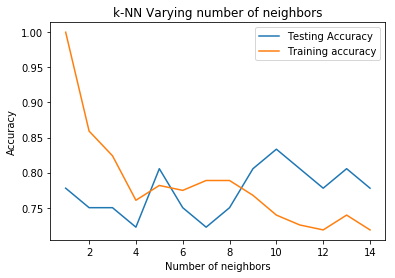

In [8]:
#Generate plot
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [9]:
#Setup a knn classifier with k neighbors as 9 gives a maxima in testing accuracy
knn = KNeighborsClassifier(n_neighbors=9)

# Training the Model

In [10]:
# Fit the model
knn.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=9, p=2,
           weights='uniform')

# Accuracy

In [11]:
#Get accuracy. Note: In case of classification algorithms score method represents accuracy.
print(knn.score(X_test,y_test))
print("Accuracy is :",str(100*knn.score(X_test,y_test))+"%")


0.8055555555555556
Accuracy is : 80.55555555555556%


# Confusion Matrix, Precision,Recall,F1-score

In [12]:
#import confusion_matrix
from sklearn.metrics import confusion_matrix

In [13]:
#let predict for X_test using the classifier we had fit above
y_pred = knn.predict(X_test)

In [14]:
confusion_matrix(y_test,y_pred) #1 points which are actually belongs to class 1,are predicted as class 1

array([[12,  0,  0],
       [ 0,  8,  6],
       [ 1,  0,  9]])

# Classification report

In [15]:
#import classification_report
from sklearn.metrics import classification_report

In [16]:
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

          1       0.92      1.00      0.96        12
          2       1.00      0.57      0.73        14
          3       0.60      0.90      0.72        10

avg / total       0.86      0.81      0.80        36



# Condensed KNN

In [17]:
X_1=np.hstack((X_train,Y_train.reshape(len(Y_train),1)))
#print(X_1)
#print(X_1.shape)
temp2=X_1.shape[0]


type(X_1)
Z=X_1[0,:]
Z=Z.reshape(1,-1)
X_1=np.delete(X_1,0,axis=0) #deleting 0'th row

ct=0
while(1):
    
    temp=False
    i=np.random.randint(0,X_1.shape[0])
    #print(i)
    dist_0=np.sqrt(np.sum((X_1[0,:]-Z[0,:])**2))
    val=0
        
    for j in range(Z.shape[0]):
            #
        dist_0=np.sqrt(np.sum((X_1[i,:]-Z[0,:])**2))
        dist=np.sqrt(np.sum((X_1[i,:]-Z[j,:])**2))
        if(dist<dist_0):
            dist_0=dist
            val=j
                    
    if(int(X_1[i,0])!=int(Z[j,0])):
        Z=np.vstack((Z,X_1[i,:]))
        temp=True
    X_1=np.delete(X_1,i,axis=0) #deleting i'th row
    
    if(temp==False):
        ct+=1
    if(ct==20):    
        break
        
print("Print the condensed set is "+str(100*(Z.shape[0]/temp2))+"% of the main dataset")


Print the condensed set is 23.239436619718308% of the main dataset


In [18]:
#The training using condensed set

x_train=Z[:,:13]
y_train=Z[:,13]

#Setup a knn classifier with k neighbors as 9 gives a maxima in testing accuracy
knn = KNeighborsClassifier(n_neighbors=9)

#Fit the model
knn.fit(x_train,y_train)


#Get accuracy. 
print("Accuracy = "+str(100*knn.score(X_test,y_test))+" %")
#let predict for X_test using the classifier we had fit above
y_pred = knn.predict(X_test)

print(classification_report(y_test,y_pred))

Accuracy = 77.77777777777779 %
             precision    recall  f1-score   support

          1       0.92      0.92      0.92        12
          2       1.00      0.57      0.73        14
          3       0.56      0.90      0.69        10

avg / total       0.85      0.78      0.78        36

